In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [14]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [15]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')

In [16]:
print(df['Дата'].dtypes)

datetime64[ns]


In [17]:
print(df.dtypes)

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [11]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()
print(grouped_df.head())

        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Вывести несколько первых строк сгруппированных данных

In [18]:
grouped_df.head()

,Дата,Количество
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


Нарисуйте график продаж у `grouped_df`

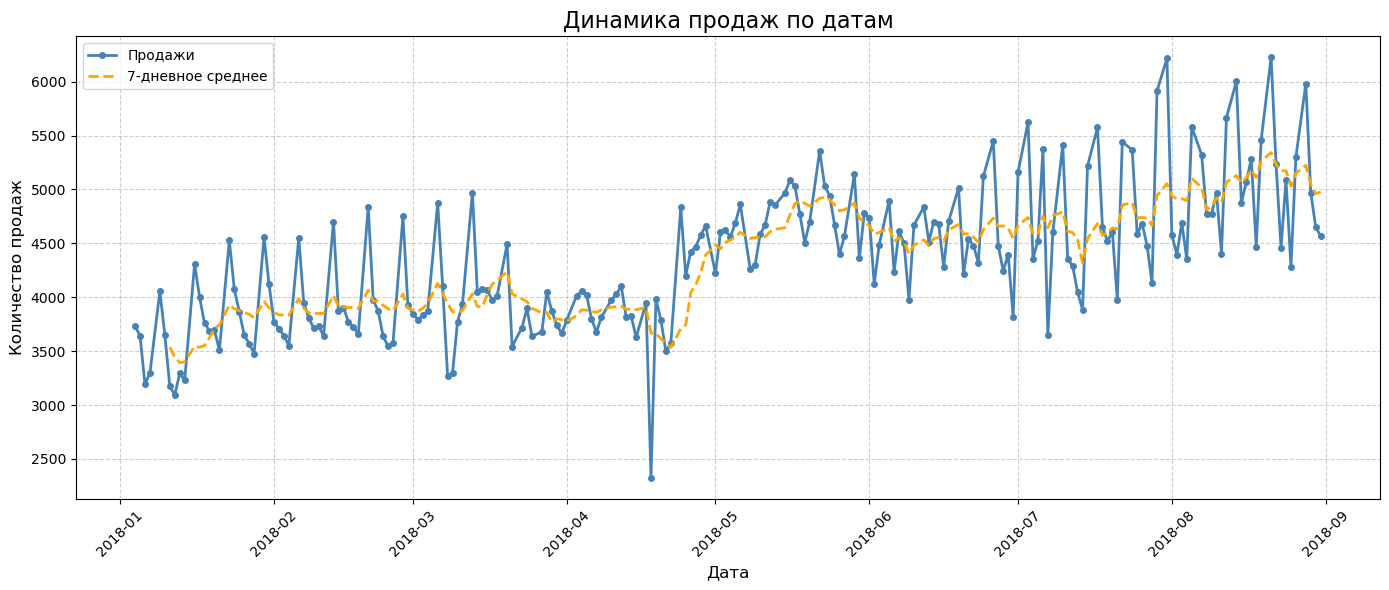

In [22]:
plt.figure(figsize=(14, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], 
         color='steelblue', linewidth=2, marker='o', markersize=4, label='Продажи')

grouped_df['Скользящее_среднее'] = grouped_df['Количество'].rolling(window=7).mean()
plt.plot(grouped_df['Дата'], grouped_df['Скользящее_среднее'], 
         color='orange', linestyle='--', linewidth=2, label='7-дневное среднее')

plt.title('Динамика продаж по датам', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество продаж', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

plt.legend()

plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

**Анализ графика динамики продаж по датам**

На графике представлена ежедневная динамика продаж за период с января по сентябрь 2018 года. Реальные значения продаж по дням отображены синим цветом, а 7-дневное скользящее среднее, позволяющее сгладить резкие колебания и выявить общий тренд, показано пунктирной оранжевой линией.

**Общие наблюдения:**
- Январь – апрель: Продажи демонстрируют умеренную и стабильную активность с выраженной цикличностью, колеблясь в диапазоне от 3 000 до 4 500 единиц в день.
- Апрель – май: Наблюдается резкий спад, вероятно вызванный техническими сбоями, праздниками или нехваткой товара, за которым следует восстановление и стабильный рост.
- Май – август: Продажи показывают выраженную положительную динамику, достигая пиковых значений около 6 200 единиц. Это может быть связано с сезонным спросом или успешными маркетинговыми кампаниями.
- Колебания: Ежедневные резкие всплески и падения продаж указывают на высокую волатильность, что может быть обусловлено различиями в днях недели, выходными или другими операционными факторами.

**Тренд**

Скользящее среднее демонстрирует устойчивый восходящий тренд, что свидетельствует об общем росте спроса на товары в течение исследуемого периода.

**Выводы:**
- В целом, продажи растут, особенно во втором полугодии.
- Выраженные пики и провалы требуют дополнительного анализа для выявления причин (например, влияние выходных, праздников, акций или проблем с поставками).
- Положительная динамика, подтвержденная скользящим средним, может быть использована для планирования будущих продаж.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [23]:
max_row = df[df['Количество'] == df['Количество'].max()]
print(max_row)

             Дата  Склад   Контрагент Номенклатура  Количество
218822 2018-06-28      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [28]:
# Фильтруем: выбираем июнь, июль, август, выбираем только среды (dayofweek == 2) и склад №3
filtered_df = df[
    (df['Дата'].dt.month.isin([6, 7, 8])) &
    (df['Дата'].dt.dayofweek == 2) &  # 0 - понедельник, 2 - среда
    (df['Склад'] == 3)]

# Группируем по номенклатуре и суммируем продажи
grouped = filtered_df.groupby('Номенклатура')['Количество'].sum()

# Находим номенклатуру с максимальными продажами без сортировки
top_product = grouped.idxmax()
top_quantity = grouped.loc[top_product]

print(f"Топовый товар: {top_product}, Количество продаж: {top_quantity}")

Топовый товар: product_1, Количество продаж: 2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [44]:
# Загружаем CSV
weather_df = pd.read_csv('weather.csv', encoding='cp1251', delimiter=';')

# Преобразуем температуру (замена запятой на точку и преобразование во float)
weather_df['T'] = weather_df['T'].str.replace(',', '.').astype(float)

# Выполняем правильное распознавание даты — с учетом dayfirst=True
weather_df['Дата'] = pd.to_datetime(weather_df['Местное время в Астане'], dayfirst=True, errors='coerce').dt.date

# Группируем по дате с расчетом средней температуры
daily_temp = (
    weather_df
    .groupby('Дата')['T']
    .mean()
    .reset_index()
    .rename(columns={'T': 'Температура'})
)

# Преобразуем 'Дата' обратно в datetime64
daily_temp['Дата'] = pd.to_datetime(daily_temp['Дата'])

# Показываем среднюю температуру за день
print(daily_temp.head())

        Дата  Температура
0 2018-01-01      -9.4625
1 2018-01-02      -9.5125
2 2018-01-03     -11.4625
3 2018-01-04     -14.0750
4 2018-01-05     -16.8625


Объединяем таблицу температуры с grouped_df

In [47]:
# Объединение по столбцу 'Дата'
merged_df = pd.merge(grouped_df, daily_temp, on='Дата', how='inner')
merged_df.drop(columns='Скользящее_среднее', inplace=True) #ранее на графике показывала скользящее, в этом графике оно не требуется
print(merged_df.head())

        Дата  Количество  Температура
0 2018-01-04        3734     -14.0750
1 2018-01-05        3643     -16.8625
2 2018-01-06        3193     -13.3000
3 2018-01-07        3298     -12.7500
4 2018-01-09        4055      -6.2500


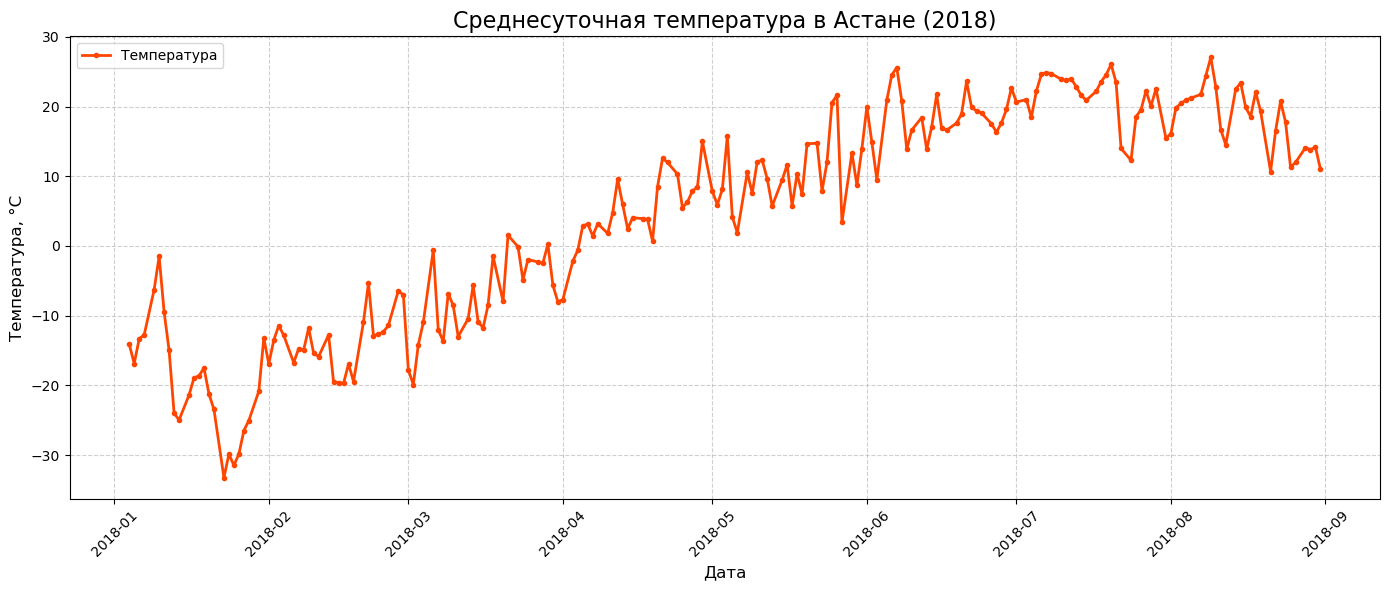

In [50]:
# График средней температуры по дням 
plt.figure(figsize=(14, 6))

# Основной график
plt.plot(merged_df['Дата'], merged_df['Температура'],
         color='orangered', linewidth=2, linestyle='-',
         marker='o', markersize=3, label='Температура')

plt.title('Среднесуточная температура в Астане (2018)', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Температура, °C', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()

plt.show()

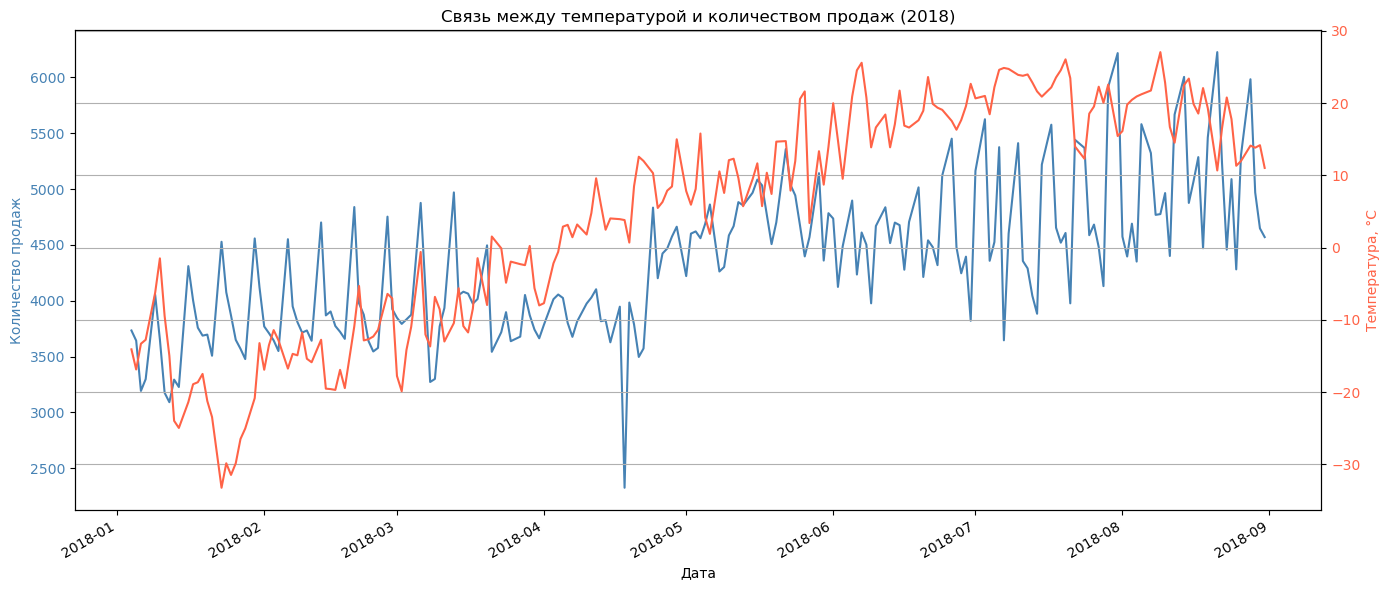

In [51]:
# График температуры и продаж вместе (две оси)
fig, ax1 = plt.subplots(figsize=(14, 6))

# Первая ось — продажи
ax1.plot(merged_df['Дата'], merged_df['Количество'], color='steelblue', label='Продажи')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Вторая ось — температура
ax2 = ax1.twinx()
ax2.plot(merged_df['Дата'], merged_df['Температура'], color='tomato', label='Температура')
ax2.set_ylabel('Температура, °C', color='tomato')
ax2.tick_params(axis='y', labelcolor='tomato')

plt.title('Связь между температурой и количеством продаж (2018)')
fig.autofmt_xdate()
plt.grid(True)
plt.tight_layout()
plt.show()

На графике зависимости температуры и количества продаж видно:
- в холодные зимние месяцы (январь–март) — продажи на более низком уровне, но не резко;
- с потеплением (апрель–июнь) наблюдается рост объёма продаж;
- в летние месяцы (июль–август), при температурах +20…+30°C, — продажи находятся на высоком и волатильном уровне, с пиками.

Это может говорить о слабой положительной зависимости - чем теплее, тем выше спрос (например, сезонные товары, напитки, одежда, выходы людей на улицу и т.п.).

In [53]:
# Расчёт корреляции между температурой и продажами

correlation = merged_df['Температура'].corr(merged_df['Количество'])
print(f'Коэффициент корреляции между температурой и продажами: {correlation:.3f}')

Коэффициент корреляции между температурой и продажами: 0.600


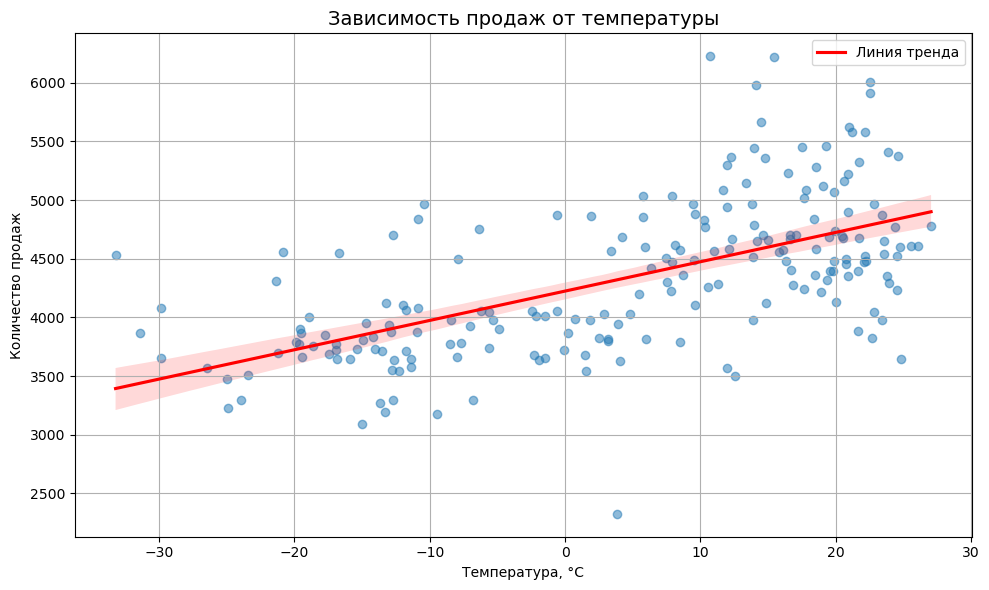

Коэффициент корреляции: 0.600


In [54]:
plt.figure(figsize=(10, 6))

# Покажем scatter plot с регрессионной линией
sns.regplot(
    data=merged_df,
    x='Температура',
    y='Количество',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red', 'label': 'Линия тренда'},
)

plt.title('Зависимость продаж от температуры', fontsize=14)
plt.xlabel('Температура, °C')
plt.ylabel('Количество продаж')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

correlation = merged_df['Температура'].corr(merged_df['Количество'])
print(f'Коэффициент корреляции: {correlation:.3f}')

Что показывает значение корреляции:
- Если значение ближе к +1 → когда температура растёт, продажи тоже растут (прямая зависимость).
- Если ближе к -1 → чем холоднее, тем больше продаж (обратная зависимость).
- Если около 0 → между температурой и продажами связи почти нет.


На графике мы видим линию тренда, которая показывает общую тенденцию (направление зависимости) между двумя переменными — в нашем случае:
- X — температура (°C)
- Y — количество продаж
